In [67]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
from astropy.io import fits
import os

matplotlib.rcParams['figure.figsize'] = (12, 10)

In [68]:
# Global variables
HOME_DIR = os.environ['HOME']
FITS_DIR = os.path.join(HOME_DIR, '.birales/visualisation/fits/')
TRACK_DIR =  os.path.join(HOME_DIR, '.birales/debug/detection/')

FITS_FILENAME = 'Observation_2018-03-21T1741/Observation_2018-03-21T1741_filtered.fits'
TRACK_FILENAME = '20180321/BIRALES_OUT_20170630_001.csv'

SENSITIVITY_THOLD = 75

In [69]:
filtered_fits_filepath = os.path.join(FITS_DIR, FITS_FILENAME)
filtered_data = fits.getdata(filtered_fits_filepath)

print ('Filtered image shape:', filtered_data.shape)

track_filepath = os.path.join(TRACK_DIR, TRACK_FILENAME)
track_df = pd.read_csv(track_filepath)

Filtered image shape: (1, 8192, 288)


In [70]:
# Reduce the raw image
min_channel, max_channel = track_df['channel_sample'].min(), track_df['channel_sample'].max()
min_time, max_time = track_df['time_sample'].min(), track_df['time_sample'].max()

# Padding in pixels
c_padding = int(max_channel-min_channel * 1.05)
t_padding = int(max_time - min_time *1.05)

print('Padding is', c_padding, t_padding)

reduced_filtered_data = filtered_data[0, min_channel-c_padding:max_channel+c_padding, min_time-t_padding:max_time+t_padding]

Padding is 105 85


(333, 212)


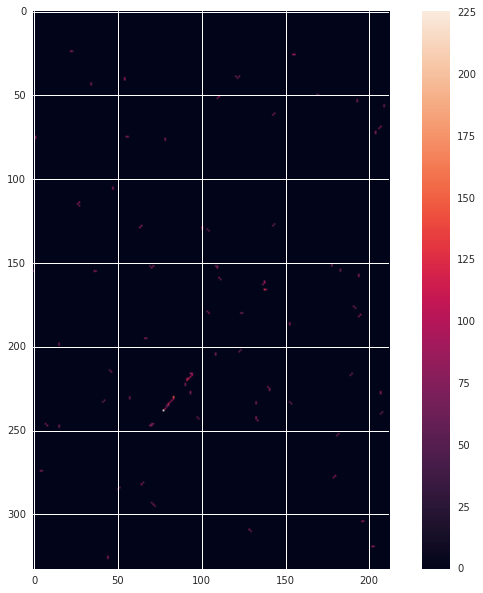

In [71]:
# Show the reduced filtered data
plt.imshow(reduced_filtered_data)
plt.colorbar()

In [72]:
expected = filtered_data[filtered_data > SENSITIVITY_THOLD].shape[0]

actual = track_df.shape[0]

print ('Expected:',expected,'Actual', actual, 'Detection Score:', np.round(actual/expected * 100,2),'%')

Expected: 491 Actual 186 Detection Score: 37.88 %
